*Теоретический материал:* https://youtu.be/zMPaYvknpng?t=103

*Разбор данного раздела:* https://youtu.be/zMPaYvknpng?t=730

In [ ]:
# Этим блоком будем визуализировать
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import scipy
 
# Библиотеки Pytorch
import torch 
import torchvision # здесь лежит mnist, cifar и много других датасетов и трансформаций для картинок
import torch.nn as nn # здесь лежат все слои
import torch.utils.data as data # работа с загрузчиком данных
import torchvision.transforms as transforms
import torchvision.datasets as dsets #работа с классом Датасет
from torch.autograd import Variable # для автоматического дифференциатора
 
# Визуализации графа
from torch.utils.tensorboard import SummaryWriter 
import datetime,os
import time
 
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
scipy.__version__

# Если версия меньше 1.2.0, то:
# pip uninstall scipy==**ваша версия**
# pip install scipy==1.3.1 

'1.3.1'

# LIGHT


## LIGHT 1

In [ ]:
# Используем готовый data loader от torch
path = 'MyData/' 
listID = os.listdir(path)
labels = torch.Tensor([[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0],[0,0,1],[1,0,0],[1,0,0],[0,1,0],[0,0,1]])
print(listID)

['4d68f14dde20e88939ce5d9b7332fff8.jpg', '2020-05-28-mixnews-sgnsns-2.jpg', '10544042_1451517158440760_175320233_n2.jpg', 'samye-smeshnye-anekdoty-i-shutki-za-iyul-2.jpg', '620x372_1_746a9f7e216c0319a09e9c90baa555e8@1000x600_0xac120003_16527519181587987211.jpg', 'unnamed.jpg', '1588745866_aneki.jpg', '1223f7c850c7816640d1b980c7296e1e.jpg', 'anekdoty-v-kartinkah-porzhat-do-slez-lbkr-aa.jpg', '620x372_1_83328a3c09376221a4552b04bfb1f8ce@1000x600_0xac120003_8299022901576762640.jpg']


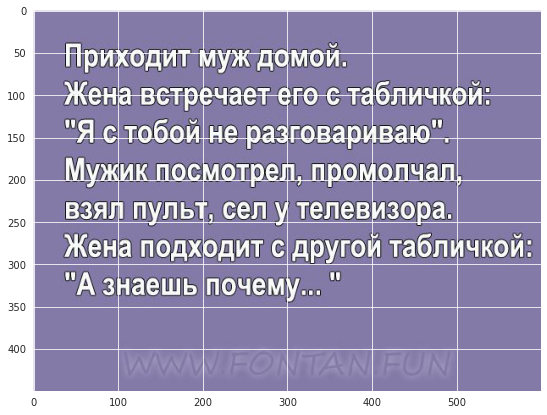

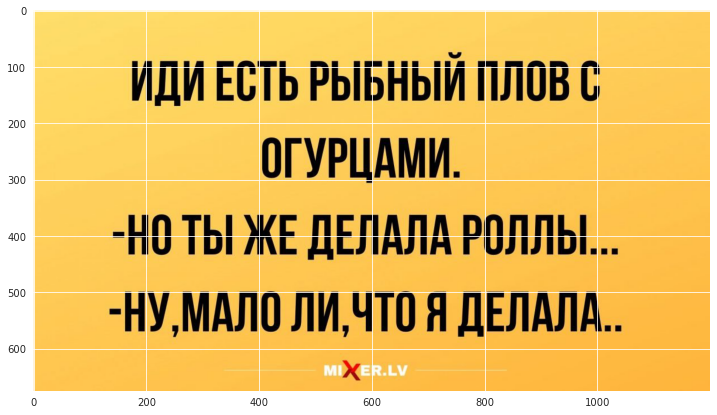

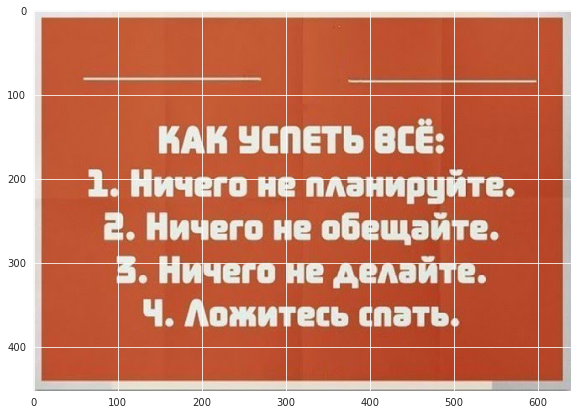

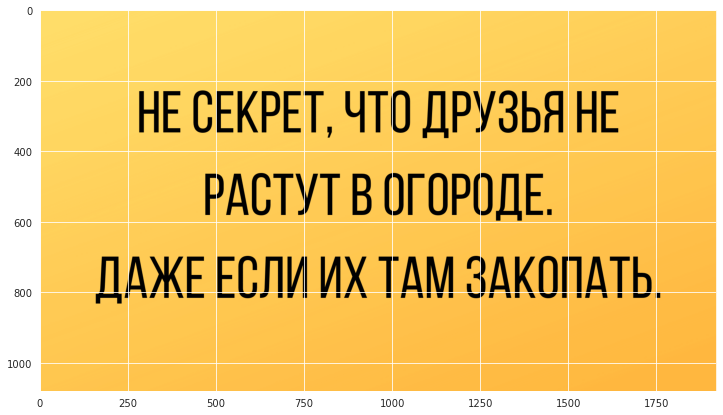

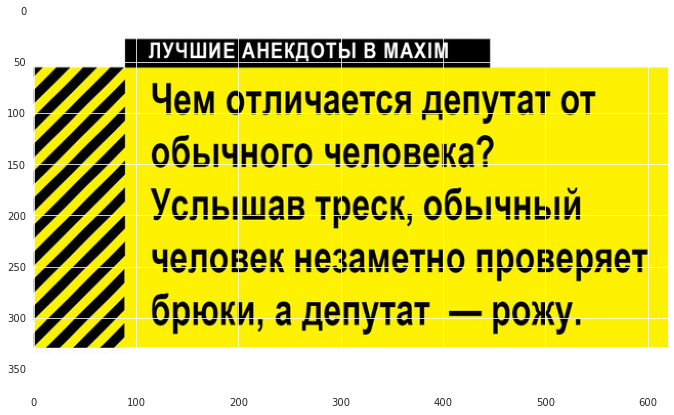

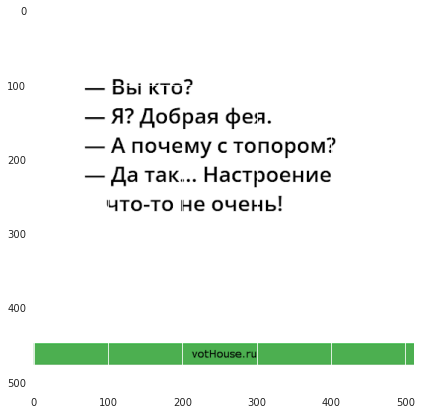

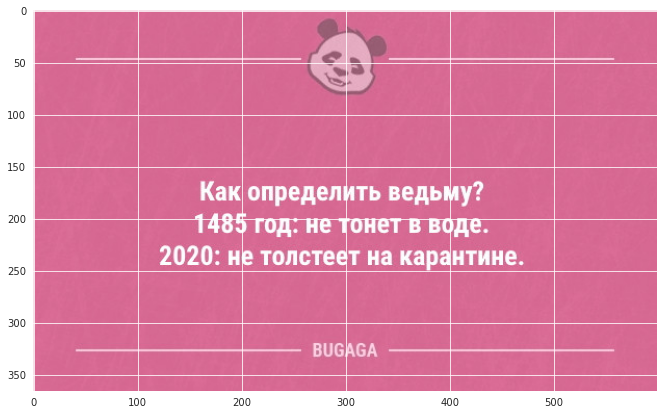

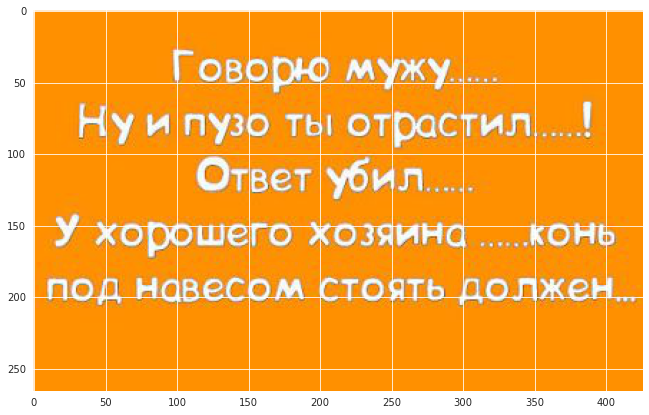

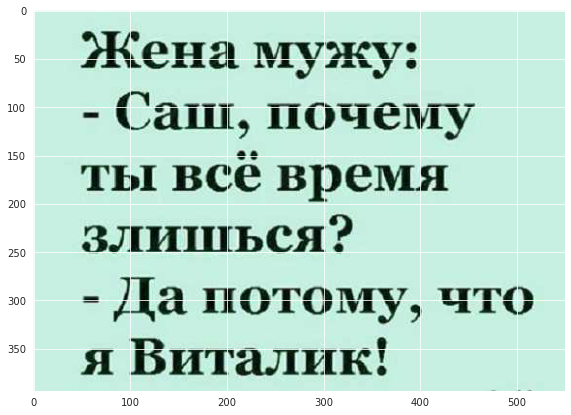

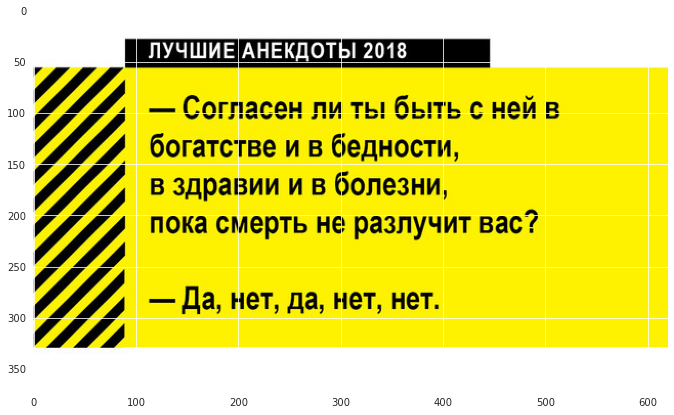

In [ ]:
for i in listID:
  plt.figure(figsize=(14,7))
  plt.imshow(Image.open(path+i))
  plt.show()

In [ ]:
# Создаем класс для собственных данных, наследуя свойства стандартного датасета
class CustomDataset(data.Dataset):
    def __init__(self, listID, labels, path, transforms = None): 
        # Инициализируем атрибуты (они абсолютно производные. У вас они могут быть совсем другими)
        self.listID = listID # listID список имен каждого экземпляра
        self.labels = labels # labels - то, что скормим как yTrain
        self.transforms = transforms # если нужны какие-то преобразования
        self.path = path # путь, где лежат данные
        

    def __getitem__(self, index):        
        # Открываем папку с данными (можно использовать numpy.fromfile, PIL.Image.open)
        ID = self.listID[index] # итерируем по каждому элементу в списке
        image = Image.open(path+ID) # извлекаем картинку по его ID

        # Если transforms заполнено, то:
        if self.transforms:
            image = self.transforms(image) # то, что лежит в transforms применяем к картинку
        trainX = image # наша картинка уходит в xTrain для этой итерации
        trainY = self.labels[index] # лейбл для этой картинки уходит в yTrain
        

        # Возвращаем пару экзмепляр-метка
        return trainX, trainY

    def __len__(self):
        # Здесь общий размер вашего датасета
        return len(listID)

In [ ]:
# Пример последовательности трансфорирмирования для изображений
transform = transforms.Compose([
        transforms.RandomRotation(90),
        transforms.Resize((32,32)),
        torchvision.transforms.Grayscale(),
        
        transforms.ToTensor(),
        transforms.Lambda(lambda x: torch.flatten(x))
        ]) # преобразование в тензор (иначе никак)


In [ ]:
customData = CustomDataset(listID,labels,path,transform)

In [ ]:
trainLoader = torch.utils.data.DataLoader(dataset=customData,
                                           batch_size=2, 
                                           shuffle=True,
                                           num_workers=4,)

In [ ]:
dataiter = iter(trainLoader)
images = dataiter.next()
images[0].shape

torch.Size([2, 1024])

## LIGHT 2

In [ ]:
inputSize = 1024
numClasses = 3
numEpochs = 10
learningRate = 0.002 
hidden = 256

In [ ]:
class Classification(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__() # наследуе все свойства + добавляем свое
        self.layer1 = nn.Linear(inputSize, hidden_size) # первый слой - линейный
        self.relu = nn.ReLU() 
        self.layer2 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1) # Поскольку задача классификации, то функция активации softmax

    def forward(self, x): # Здесь мы прописываем принципы, по которым данные будут проходить через сеть
        out = self.layer1(x)  # выход первого слоя
        out = self.relu(out) # применяем функцию активации к выходу первого слоя
        out = self.layer2(out) # передаем это во второй слой
        out = self.softmax(out) # применяем функцию активации ко второму слою
        return out

model = Classification(inputSize, hidden, numClasses) # Создаем о

## LIGHT 3

In [ ]:
criterion = nn.L1Loss() 
optimizer = torch.optim.RMSprop(model.parameters(), lr=learningRate)  # оптимизатор
losses = [] # сюда будет добавляться средняя ошибка. Список будем использовать для построения графика
model.train() # переход в режим обучения (опционально)

Classification(
  (layer1): Linear(in_features=1024, out_features=256, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=256, out_features=3, bias=True)
  (softmax): Softmax(dim=1)
)

Эпоха: [1/10], Ошибка: 0.6667
Эпоха: [2/10], Ошибка: 0.6667
Эпоха: [3/10], Ошибка: 0.3333
Эпоха: [4/10], Ошибка: 0.3333
Эпоха: [5/10], Ошибка: 0.6667
Эпоха: [6/10], Ошибка: 0.0000
Эпоха: [7/10], Ошибка: 0.3333
Эпоха: [8/10], Ошибка: 0.6667
Эпоха: [9/10], Ошибка: 0.3333
Эпоха: [10/10], Ошибка: 0.6667


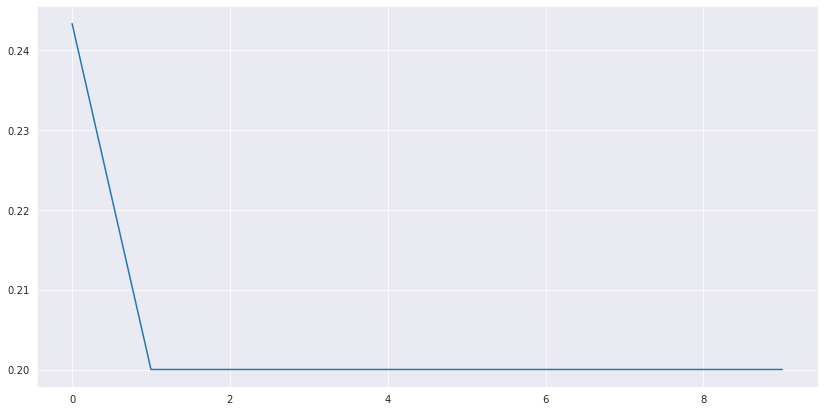

In [ ]:
for epoch in range(numEpochs): # количество эпох
    lossTot = 0 # потери в совокупности

    for i, (images, labels) in enumerate(trainLoader): # проходимся по всем данным в batch

        optimizer.zero_grad() # обнуляем градиент
        outputs = model(images) # здесь наше предсказание
        
        loss = criterion(outputs, labels) # считаем ошибку 
        loss.backward()  # обратное распространение. 
                         # x.grad += dloss/dx для всех параметров x

        lossTot +=loss.detach().data # инкремент ошибки
        
        optimizer.step() # следующий шаг спуска

    losses.append(lossTot/len(customData)) # вычисляем среднюю ошибку и добавляем в список
    print('Эпоха: [%d/%d], Ошибка: %.4f' 
           % (epoch+1, numEpochs, loss))
plt.figure(figsize=(14,7))
plt.plot(losses) # График нашего обучения
plt.show()

# PRO - 1

Для автокодировщика выбрал базу FASHION MNIST

In [ ]:

batchSize = 100

# Обучающая выборка
trainDataset = dsets.FashionMNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)
# Тестовая выборка
testDataset = dsets.FashionMNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Dataset Loader (подготовка данных для сети)
trainLoader = torch.utils.data.DataLoader(dataset=trainDataset, # Какой датасет
                                           batch_size=batchSize, # На сколько batch разделен
                                           shuffle=True) 

testLoader = torch.utils.data.DataLoader(dataset=testDataset, #  Какой датасет
                                          batch_size=batchSize, # На сколько batch разделен
                                          shuffle=False)


In [ ]:
# Посмотрим на нашу выборку
dataIter = iter(trainLoader) # По какой выборке пройдемся
trainX, trainY = dataIter.next() # Присваиваем текущий batch

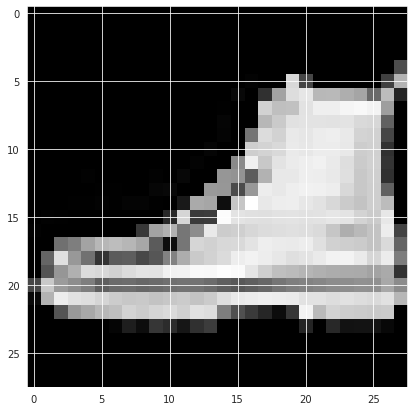

In [ ]:
plt.figure(figsize=(14,7))
plt.imshow(trainX[1, 0], cmap='gray')
plt.show()

In [ ]:
inputSize = 784
numClasses = 10
numEpochs = 30
learningRate = 0.001 


In [ ]:
class Autoenc(nn.Module):
    def __init__(self):
        super(Autoenc, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding = 2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding = 2),
            nn.BatchNorm2d(32), 
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer1 = self.layer1.cuda()
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding = 2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding = 2),
            nn.BatchNorm2d(64), 
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = self.layer2.cuda()
        self.layer3 = nn.Sequential(
            nn.ConvTranspose2d(64, 64, kernel_size=2, stride=2, padding = 2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding = 0),
            nn.BatchNorm2d(64), 
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding = 2),
            nn.BatchNorm2d(64), 
            nn.ReLU())
        self.layer3 = self.layer3.cuda()
        self.layer4 = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2, padding = 2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding = 2),
            nn.BatchNorm2d(32), 
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding = 0),
            nn.BatchNorm2d(32), 
            nn.ReLU())
        self.layer4 = self.layer4.cuda()
        self.fc = nn.Sequential(
            nn.Conv2d(32, 1, kernel_size=3, padding = 1),
            nn.Sigmoid())
        self.fc = self.fc.cuda()
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)

        out = self.fc(out)
        return out

model = Autoenc()

In [ ]:
# Ошибка и оптимизатор
criterion = nn.MSELoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)  
model.train()

Autoenc(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): ConvTranspose2d

Эпоха: [1/30], Ошибка: 0.0026
Эпоха: [2/30], Ошибка: 0.0019
Эпоха: [3/30], Ошибка: 0.0015
Эпоха: [4/30], Ошибка: 0.0014
Эпоха: [5/30], Ошибка: 0.0015
Эпоха: [6/30], Ошибка: 0.0012
Эпоха: [7/30], Ошибка: 0.0011
Эпоха: [8/30], Ошибка: 0.0010
Эпоха: [9/30], Ошибка: 0.0010
Эпоха: [10/30], Ошибка: 0.0009
Эпоха: [11/30], Ошибка: 0.0010
Эпоха: [12/30], Ошибка: 0.0007
Эпоха: [13/30], Ошибка: 0.0008
Эпоха: [14/30], Ошибка: 0.0009
Эпоха: [15/30], Ошибка: 0.0008
Эпоха: [16/30], Ошибка: 0.0008
Эпоха: [17/30], Ошибка: 0.0009
Эпоха: [18/30], Ошибка: 0.0009
Эпоха: [19/30], Ошибка: 0.0008
Эпоха: [20/30], Ошибка: 0.0007
Эпоха: [21/30], Ошибка: 0.0007
Эпоха: [22/30], Ошибка: 0.0007
Эпоха: [23/30], Ошибка: 0.0006
Эпоха: [24/30], Ошибка: 0.0006
Эпоха: [25/30], Ошибка: 0.0005
Эпоха: [26/30], Ошибка: 0.0005
Эпоха: [27/30], Ошибка: 0.0006
Эпоха: [28/30], Ошибка: 0.0005
Эпоха: [29/30], Ошибка: 0.0006
Эпоха: [30/30], Ошибка: 0.0006


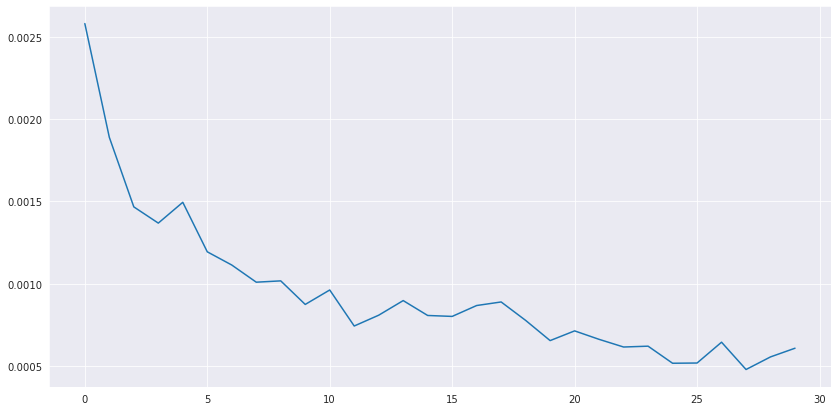

Время обработки:  314


In [ ]:
# Обучение модели
history = []
curTime = time.time()
for epoch in range(numEpochs):
    for i, (images, _) in enumerate(trainLoader):   
        images = images.cuda()
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()             
        
    print('Эпоха: [%d/%d], Ошибка: %.4f' 
          % (epoch+1, numEpochs, loss))
    history.append(loss)   
plt.figure(figsize = (14,7))
plt.plot(history)
plt.show()
print('Время обработки: ', round(time.time() - curTime))

In [ ]:
def getMSE(x1, x2): # создадим функцию среднеквадратичной ошибки
  x1 = x1.flatten() # сплющиваем в одномерный вектор
  x2 = x2.flatten() # сплющиваем в одномерный вектор
  delta = x1 - x2 # находим разницу
  return sum(delta ** 2) / len(delta) # и возвращаем сумму квадратов разницы, делённую на длину разницы

In [ ]:
def plotImages(xTrain, pred, shape=(28, 28)): # создадим функцию для вывода изображений как картинок
  n = 5  # количество картинок, которые хотим показать
  plt.figure(figsize=(10, 4)) # указываем размеры фигуры
  xTrain = xTrain.cpu().numpy()
  pred = pred.cpu().detach().numpy()
  mse_test = getMSE(xTrain, pred)
  for i in range(n): # для каждой картинки из n(5)
      index = np.random.randint(0, pred.shape[0]) # startIndex - начиная с какого индекса хотим заплотить картинки
 
      ax = plt.subplot(2, n, i + 1) # выведем область рисования Axes
      plt.imshow(xTrain[index].reshape(shape)) # отрисуем правильные картинки в размере 112*80      
      plt.gray() # выведем в черно-белом цвете
      ax.get_xaxis().set_visible(False) # скрываем вывод координатной оси x
      ax.get_yaxis().set_visible(False) # скрываем вывод координатной оси y

      # Показываем восстановленные картинки
      ax = plt.subplot(2, n, i + 1 + n) # выведем область рисования Axes 
      plt.imshow(pred[index].reshape(shape)) # отрисуем обработанные сеткой картинки в размере 112*80     
      plt.gray() # выведем в черно-белом цвете
      ax.get_xaxis().set_visible(False) # скрываем вывод координатной оси x
      ax.get_yaxis().set_visible(False) # скрываем вывод координатной оси y
  plt.show()
  print('ошибка на данном батче тестового набора: ', mse_test)

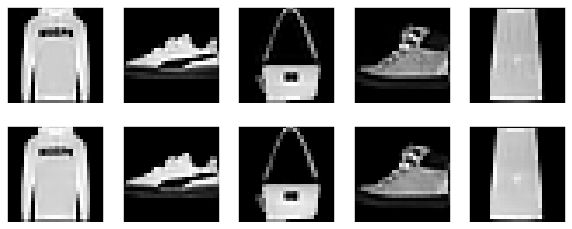

ошибка на данном батче тестового набора:  0.0005195811837845855


In [ ]:
# Проверка результатов
model.eval()  # включаем режим проверки

dataIter = iter(testLoader) 
testX, _ = dataIter.next() 

testX = testX.cuda()
pred = model(testX)

plotImages(testX, pred)

# **Глоссарий**
*   **train dataset** - объект, включающий в себя ваш набор данных. На выходе такого объекта всегда должен быть тензор.
*   **train loader** - объект, в который вы подгружаете ваш train dataset, и который используете при обучении нейронной сети для итерирования по всему набору данных. 
*   **optimizer.zero_grad()** - обнуляет результат дифференциирования.
*   **loss.backward()** - считает градиент для обратного распространения ошибки. 
*   **optimizer.step()** - принимает (автоматически) посчитанные градиенты и делает шаг оптимизации.
*   **nn.Module** - базовый класс нейронной сети, на котором строится собственная нейронная сеть.
*   **def forward(self,x)** - функция-движитель. Связывает инициализированные слои. На вход принимается х (batch) и передается дальше по всем слоям.
*   **data.Dataset** -  базовый класс дата сета, на котором строится собственный датасет.
*   **.view()** - функция, интерпретирующая размер объекта для данной итерации в том виде, который указан в качестве параметра.
*   **.data** - получить исключительно статичные данные из тензора.
*   **.detach()** - открепить тензор от вычислительного графа.
*   **model.train()** - перевести объект нейронки в обучающи режим.
*   **model.eval()** - перевести объект нейронки в режим оценки.

# **Обратите внимание**

*   В параметрах тензора вы можете вручную прописать поддержку дифференциирования
*   Для удобства всегда создавайте DataLoader. Для DataLoader необходим Dataset
*   Dataset всегда можно прописать "вручную"
*   Прописываете архитектуру модели через отдельный класс
*   Выбирая функцию ошибки, смотрите, какой формат должен подаваться на вход
*   Во время обучения не забывайте о последовательности .zero_grad -> .backward -> .step
*   Режимы тренировочный и оценочный являются *разными* для Pytorch. Не забывайте указывать это в начале.    


